# 220515 Figure 2 draft

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from matplotlib.ticker import MultipleLocator
import seaborn as sns
from scipy.stats import spearmanr

In [2]:
from gambit_pub.utils import genome_set_label

In [3]:
%matplotlib inline

In [4]:
plt.rcdefaults()

## Setup

In [5]:
DATESTR = '220515'
NBNAME = f'{DATESTR}-figure-2-draft'

In [6]:
infiles = dict(
    stats=Path('/home/jared/code/gambit/gambit-publication/results/figure-2/gambit-ani-correlation.csv'),
)

In [7]:
processed_out = Path('data-processed/') / NBNAME
processed_out.mkdir(exist_ok=True)

## Load data

In [8]:
df = pd.read_csv(infiles['stats'], index_col=[0, 1, 2, 3])

In [9]:
genome_sets, k_vals, prefix_lens, prefix_versions = df.index.levels

In [10]:
# Map (length, version) -> prefix string
prefix_map = df.reset_index().set_index(['prefix_len', 'prefix_version'])['prefix'].drop_duplicates().to_dict()

In [11]:
df['genomeset_label'] = list(map(genome_set_label, df.index.get_level_values('genomeset')))
df['spearman_abs'] = df['spearman'].abs()

In [12]:
# Baseline correlation with default parameters
bl_k = 11
bl_plen = 5
bl_pver = 0
bl_prefix = prefix_map[(bl_plen, bl_pver)]
baselines = df.xs((bl_k, bl_plen, bl_pver), level=('k', 'prefix_len', 'prefix_version'))['spearman'].to_dict()

## Plots

In [13]:
plt.rcParams.update({
    'axes.grid': True,
    'axes.grid.axis': 'y',
    'axes.labelsize': 14,
    'axes.labelpad': 15,
})

In [14]:
relplot_kw = dict(
    kind='line',
    height=3,
    markers=['o' for _ in genome_sets],
    dashes=False,
    facet_kws=dict(despine=False),
)

In [15]:
def finish_facetgrid(fg):
    fg.set_ylabels('$\\rho$', rotation='horizontal')
    fg.set_xlabels('$k$')
    fg.set(xticks=k_vals, ylim=[.9, 1])
    fg.legend.set_title('Genome Set')
    
    for ax in set(fg._not_bottom_axes):
        ax.tick_params(bottom=False)
    for ax in set(fg._not_left_axes):
        ax.tick_params(left=False)

In [16]:
def highlight_ax(ax):
    for spine in ax.spines.values():
        spine.set_color('blue')

### B

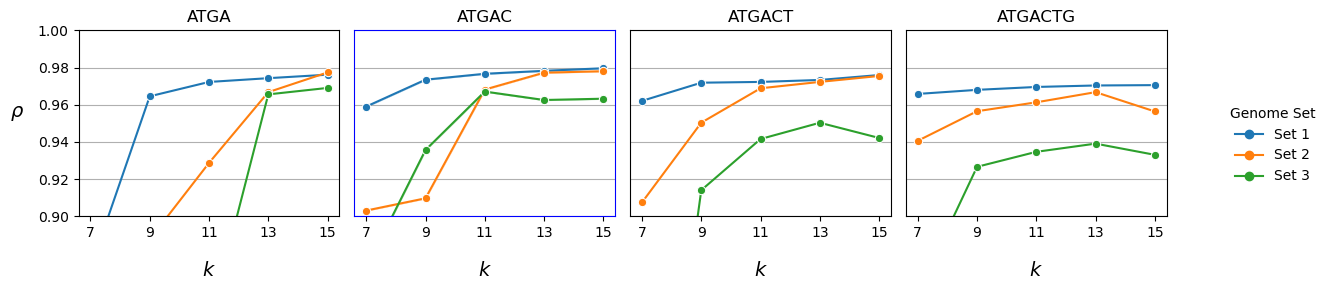

In [17]:
fg = sns.relplot(
    data=df.xs(0, level='prefix_version').reset_index(),
    style='genomeset_label',
    x='k',
    y='spearman_abs',
    hue='genomeset_label',
    col='prefix_len',
    col_wrap=4,
    aspect=1,
    **relplot_kw,
)

for plen, ax in fg.axes_dict.items():
    ax.set_title(prefix_map[plen, 0])

finish_facetgrid(fg)
fg.tight_layout()
highlight_ax(fg.axes_dict[5])

fg.savefig(processed_out / f'{DATESTR}-figure-2b-draft.png', dpi=300)

### C

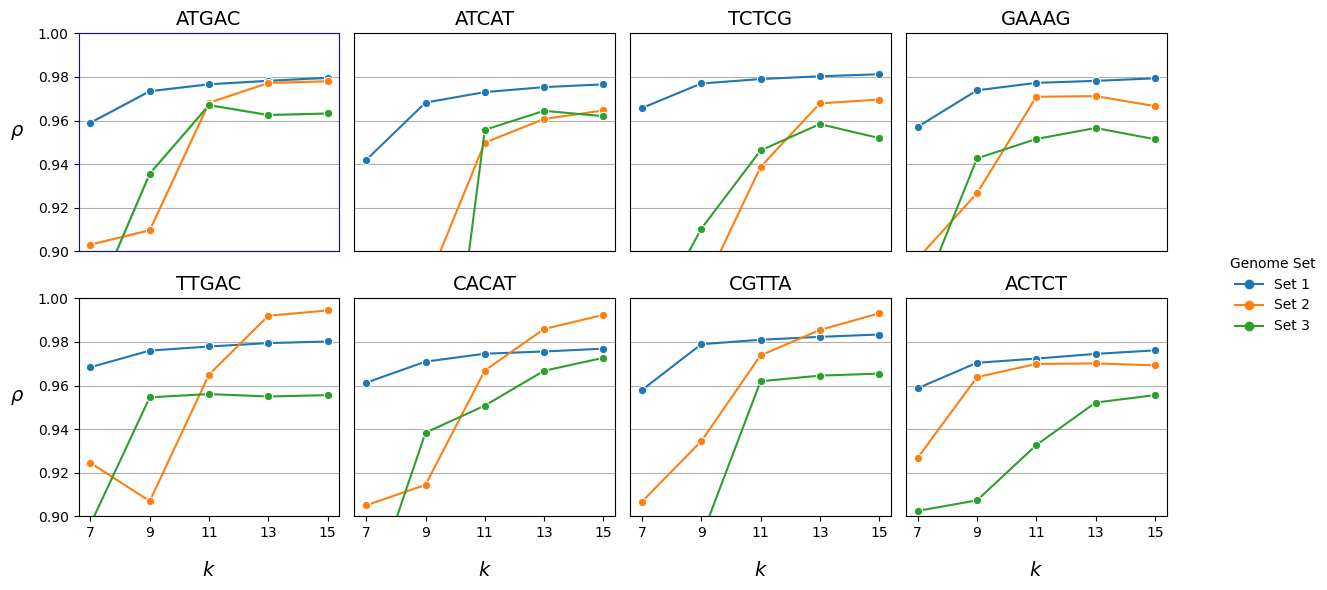

In [18]:
fg = sns.relplot(
    data=df.xs(5, level='prefix_len').reset_index(),
    style='genomeset_label',
    x='k',
    y='spearman_abs',
    hue='genomeset_label',
    col='prefix',
    col_wrap=4,
    **relplot_kw,
)

fg.set_titles(template='{col_name}')
finish_facetgrid(fg)
fg.legend.set_title('Genome Set')
fg.tight_layout()
highlight_ax(fg.axes_dict['ATGAC'])

fg.savefig(processed_out / f'{DATESTR}-figure-2c-draft.png', dpi=300)